In [1]:
import imageio
import moviepy.editor as mpy

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

# We'll need IPython.display's Audio widget
from IPython.display import Audio

In [2]:
filename = './data/video_2022-11-08_08-31-43.mp4'

# Extracting audio from mp4 vide file 

In [ ]:
filename = './data/video_2022-11-08_08-31-43.mp4'
audio = mpy.AudioFileClip(filename)
print(audio.__dict__)
audio.write_audiofile('./data/audio.wav')

# Processing the audio

In [3]:
audio, sr = librosa.load('./data/audio.wav')
print(sr)

22050


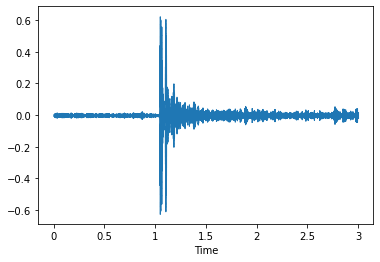

In [4]:
ta0 = 49
ta1 = 52
cut = np.arange(ta0*sr,ta1*sr)
librosa.display.waveshow(audio[cut], sr=sr)
plt.show()

In [5]:
Audio(data=audio[cut], rate=sr)

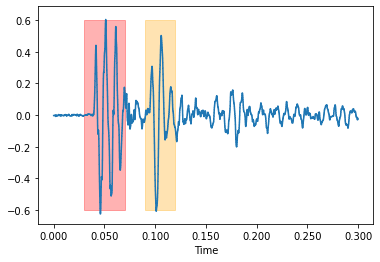

In [46]:
ta0 = 50
ta1 = 50.3
cut = np.arange(int(round(ta0*sr)), int(round(ta1*sr)))
# cut
librosa.display.waveshow(audio[cut], sr=sr)
plt.fill_between([0.03, 0.07], -0.6, 0.6, color='r', alpha=0.3)
plt.fill_between([0.09, 0.12], -0.6, 0.6, color='orange', alpha=0.3)
plt.show()

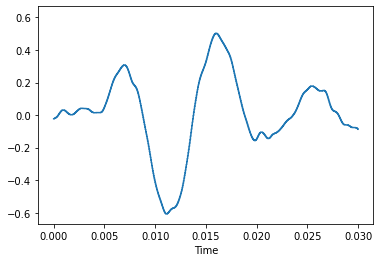

audio min: 1104729 audio max: 1104836
50.10108843537415 50.1059410430839
thunder_time: 50.101 s


In [63]:
cut = np.arange(int(round((ta0+0.09)*sr)), int(round((ta0+0.12)*sr)))
librosa.display.waveshow(audio[cut], sr=sr)
plt.show()
print('audio min:', cut[0]+audio[cut].argmin(), 
      'audio max:', cut[0]+audio[cut].argmax())

print((cut[0]+audio[cut].argmin())/sr, (cut[0]+audio[cut].argmax())/sr)
thunder_time = (cut[0]+audio[cut].argmin())/sr
print(f'thunder_time: {thunder_time:.3f} s')

# Processing the video

In [6]:
video = imageio.get_reader('./data/video_2022-11-08_08-31-43.mp4',  'ffmpeg')

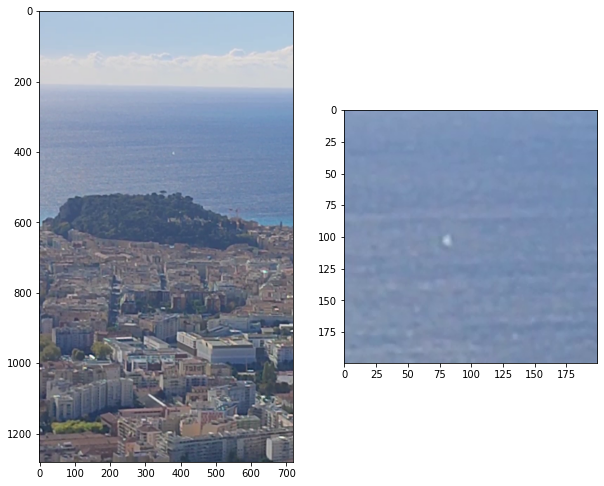

fps = 60.0 duration = 57.65 s


In [84]:
video_meta = video.get_meta_data()
fps = video_meta['fps']

frame = video.get_data(2441)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
ax[0].imshow(frame)
data = frame[300:500, 300:500, :]
ax[1].imshow(data)
plt.show()

print('fps =', video_meta['fps'], 'duration =', video_meta['duration'], 's')

# Detection of the strike cloud

frame: 2340


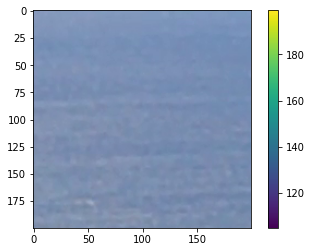

frame: 2370


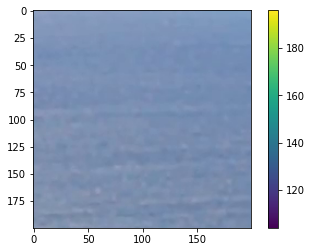

frame: 2400


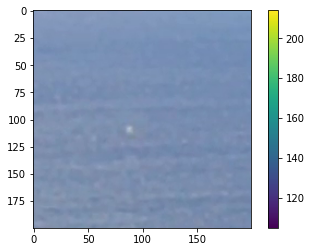

frame: 2430


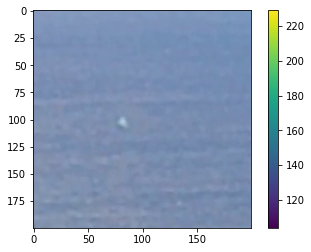

Done


In [12]:
tv0 = 39
tv1 = 41

nums = np.arange(tv0*fps, tv1*fps, step=fps/2, dtype=int)
for num in nums:
    frame = video.get_data(num)
    # print(frame.shape)
    # plt.imshow(frame[500:700, 250:450, :])
    data = frame[300:500, 300:500, :]
    cb = plt.imshow(data)
    print('frame:', num)
    plt.colorbar(cb)
    plt.show()
print('Done')

In [15]:
tv0 = 39
tv1 = 41
diff = []
nums = np.arange(tv0*fps, tv1*fps, step=1, dtype=int)
for num in nums:
    frame = video.get_data(num)
    # print(frame.shape)
    # plt.imshow(frame[500:700, 250:450, :])
    data = frame[300:500, 300:500, :]
    diff.append([data[:,:,0].max()-data[:,:,0].min(),
                 data[:,:,1].max()-data[:,:,1].min(),
                 data[:,:,2].max()-data[:,:,2].min()])
    # cb = plt.imshow(data)
    # print(num, data.max(), data.min(), data.max()-data.min())
    # plt.colorbar(cb)
    # plt.show()
diff = np.array(diff)
print('Done')

Done


## The intensity changes in the search window

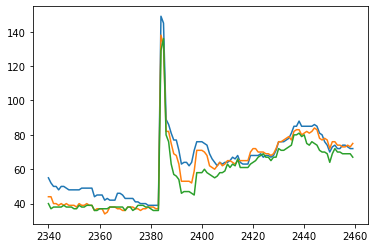

In [16]:
plt.plot(nums, diff[:,0], label='red')
plt.plot(nums, diff[:,1], label='green')
plt.plot(nums, diff[:,2], label='blue')
plt.show()

2383
2383 196 106 90


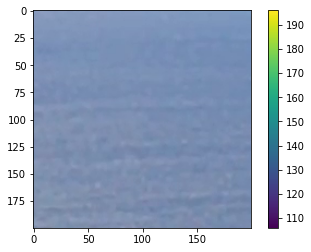

2384
2384 255 106 149


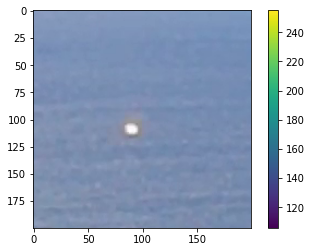

2385
2385 255 106 149


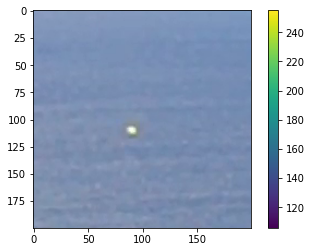

2386
2386 224 106 118


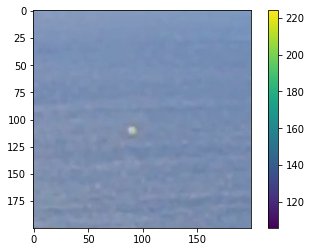

In [19]:
bmax = diff[:,2].argmax()
nums = list(np.arange(tv0*fps+bmax-2, tv0*fps+bmax+2, dtype=int))
for num in nums:
    print(num)
    frame = video.get_data(index=num)
    data = frame[300:500, 300:500, :]
    cb = plt.imshow(data)
    print(num, data.max(), data.min(), data.max()-data.min())
    plt.colorbar(cb)
    plt.show()

In [58]:
flash_time = tv0 + bmax/fps
print('Flash time: ', flash_time)


Flash time:  39.75


# Lets compute the distance

In [75]:
sound_time = thunder_time - flash_time
print(f'{sound_time:.3f} \u00B1 0.016 s')

10.351 ± 0.016 s


In [80]:
distance = sound_time * 340.0 # m/s sea level 15 C
print(f'The distance is: {distance:.0f} \u00B1 {0.016*340:.0f} m')

The distance is: 3519 ± 5 m
